#### DSC550-T301 
#### Week-2
##### Chitramoy Mukherjee
##### Date: 12/7/2023

## Introduction :

### Studies have demonstrated that music impacts numerous parts of the brain, including those involved in emotion, cognition, sensory, and movement. 

### In fact, music therapy for mental health has been utilized as a therapeutic aid for millennia.Music therapy, or MT, is the use of music to improve an individual's stress, mood, and overall mental health. MT is also recognized as an evidence-based practice, using music as a catalyst for "happy" hormones such as oxytocin.

### MT employs a wide range of different genres, varying from one organization to the next.

### The MxMH dataset aims to identify what, if any, correlations exist between an individual's music taste and their self-reported mental health. Ideally, these findings could contribute to a more informed application of MT or simply provide interesting sights about the mind.

In [32]:
import warnings 
warnings.filterwarnings('ignore')

# Required python basic libraries 

import numpy as np
import pandas as pd

#Required python visualization libraries

# import missingno as msno
import matplotlib
import matplotlib.pyplot as plt

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

### Reading the mxmh_survey_results.csv dataset
df = pd.read_csv("C:\\Users\\14024\\OneDrive\\Desktop\\MS-DSC\\DSC-550\Week-2\\mxmh_survey_results.csv")

# Check first 5 rows of the dataset 
df.head()


,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [33]:
# Check column name and datatype and constraints of mxmh_survey_results.csv dataset.
# Identify the columns (variables) from the dataset will be used for analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

## Questions to explore from mxmh_survey_results.csv dataset.

### 1. What age range people listen to music more as epr the the survey data?
### 2. What is the most used streaming service based on mxmh_survey_results.csv dataset data.
### 3. Which streaming service being used by what range people as per the data?
### 4. Which genre music is popular in what age range people?
### 5. How Frequently people listen to classical music as per the survey data?
### 6. Which one is the most popular genre of music as per the survey data?


### Identify the variables will be used during analysis and describe them
    
        1.   Age                          : Respondent's age
        2.   Primary streaming service    : Respondent's primary streaming service.
        3.   Hours per day                : Number of hours the respondent listens to music per day.
        4.   Anxiety                      : Anxiety level between 1 to 10.
        5.   Depression                   : Depression level between 1 to 10.
        6.   Insomnia                     : Insomnia level between 1 to 10.
        7.   BPM                          : BPM is the abbreviation of beats per minute, a musical term 
                                            that means measuring the tempo of the music.
        8.   While working                : Does the respondent listen to music while studying/working?
        9.   Instrumentalist              : Does the respondent play an instrument regularly?
       10.   Composer                     : Does the respondent compose music?
       11.   Fav genre                    : Respondent's favorite or top genre?
       12.   Exploratory                  : Does the respondent actively explore new artists/genres?
       13.   Foreign languages            : Listen to Foreign language music?

In [34]:
# Check lat 5 rows of the dataset 
df.tail()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.
735,11/9/2022 1:55:20,29.0,YouTube Music,2.0,Yes,No,No,Hip hop,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Rarely,2.0,2.0,2.0,5.0,Improve,I understand.


Text(0.5, 1.0, 'Graph-1 (Histogram) : Count of music listener based on age')

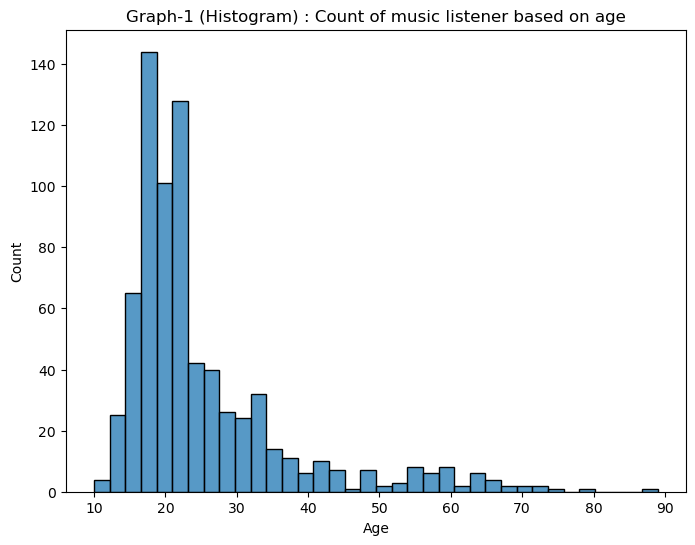

In [35]:
# Plotting count of people between different age range to identify what age people listen to music more
plt.figure(figsize=(8,6))
sns.histplot(df['Age'])

plt.title('Graph-1 (Histogram) : Count of music listener based on age')

Text(0.5, 1.0, 'Graph-2 (bar plot) : Count of music listener based on service provider')

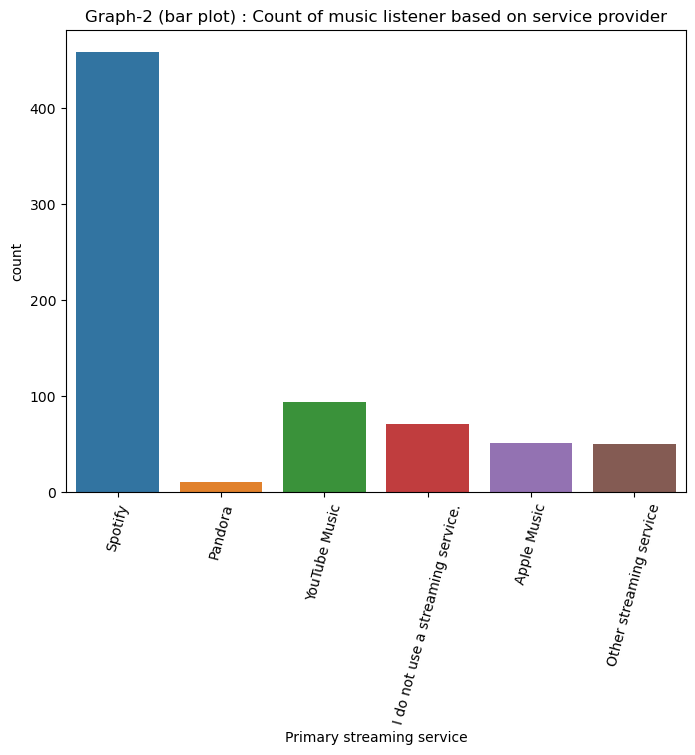

In [36]:
#Plot count vs Primary streaming service to identify the most popular streaming service as per survey data.
plt.figure(figsize=(8,6))
sns.countplot(x=df['Primary streaming service'])
plt.xticks(rotation=75)

plt.title('Graph-2 (bar plot) : Count of music listener based on service provider')

Text(0.5, 1.0, 'Graph-3 (Boxplot): Streaming services by Age')

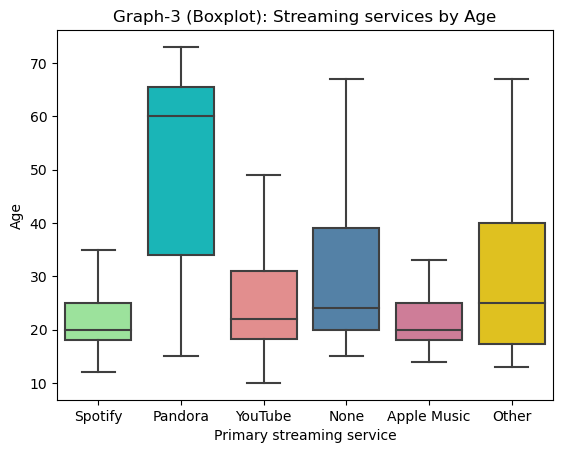

In [37]:
# Streaming service by age plotting

import seaborn as sns

s_colors2 = ['lightgreen', 'darkturquoise', 'lightcoral', 'steelblue', 'palevioletred', 'gold']

df.replace(['Other streaming service', 'I do not use a streaming service.', 'YouTube Music'],
                       ['Other', 'None', 'YouTube'], inplace=True)

bplot = sns.boxplot(data=df, x="Primary streaming service", y = "Age",
            showfliers = False,
            palette = s_colors2)

plt.title('Graph-3 (Boxplot): Streaming services by Age')

#pandora is the most widely used between 33-62 years of age, younger people are mostly inclined towards Apple music and Spotify.

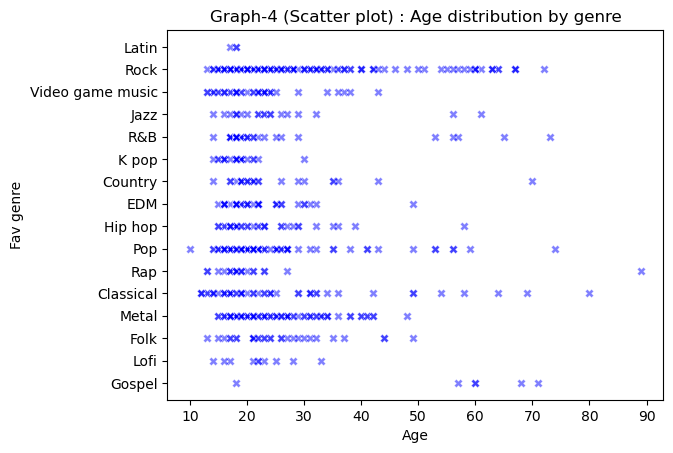

In [38]:
# Plot age distribution by genre

sns.scatterplot(data=df, y="Fav genre", x="Age", alpha = 0.5, marker = "X", color = "Blue")
plt.title('Graph-4 (Scatter plot) : Age distribution by genre');

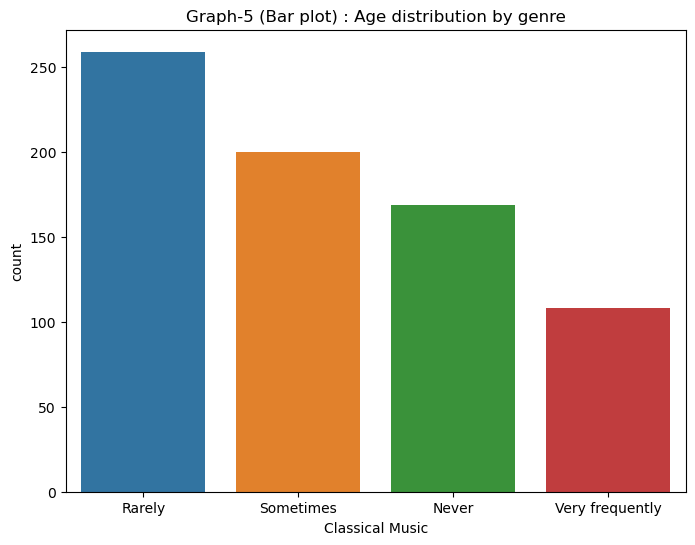

In [39]:
# Plot count based on the Frequency of listening classical music
plt.figure(figsize=(8,6))
sns.countplot(x=df['Frequency [Classical]'])
plt.xlabel('Classical Music')

plt.title('Graph-5 (Bar plot) : Age distribution by genre');

Text(0, 0.5, '')

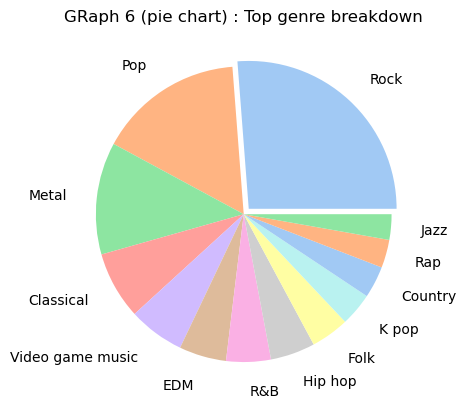

In [40]:
# Most popular genre of music as per the survey data

genre = df["Fav genre"].value_counts().loc[lambda x: x>10]
genre.plot(kind='pie', labeldistance = 1.2, 
            explode=[0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,], 
            colors = sns.color_palette('pastel')[0:13])

plt.title('GRaph 6 (pie chart) : Top genre breakdown')
plt.ylabel("")

# Rock is the most popular followed by pop and Metal.

## Explain what is being learned from each graphs 

### Graph-1 : This histogram plot shows the count of people of different age who listen to music for MT as per the survey daya.  As per the plotting it's cleaarly shows people with age 16-20 listen music most.

### Graph-2 : This bar diagram clearly demonstrates that spotify is the most popular services among the music listener and pandora is the least popular service as per the survey data.

### Graph-3 :  Graph-3 is the box plot which shows that pandora streaming service  is used by wide age range people between 35 to 60 years where as Apple music/Spotify used by young age people.

### Graph-4 :  Graph-4 shows Rock has the most diverse range of ages. Classical and Pop listeners also have a wider range of ages compared to other genres. Some music genres, such as K pop and Lofi appear to attract a more specific and younger age group.

### Graph-5 : Graph-5 shows the popularity of classical music among the listener. As per the plotting most of the people responded as they rarely listen classical music.

### Graph-6 : This pie chart shows Rock is the most popular genre among the music listener ans pop is the 2nd most popular. 


## Conclusssion :

### After analyzing the data using different visualization we have identified  which age group people mostly listen to the music and what is the most popular genre music  among which group of people.  Using this servey data we have identfied the most popular service providerand what age range people is more inclined towards which service. Definitely this survey data can be utilized for identifying the effect of music on mental health using some other different columns/ attributes from the dataset.  Columns used for plotting and visualization doesn't contains any null or missing  values, so doesn't need much data cleanup. Most of the obesrvations from the graphical plotting has been provided above in the explanation section.
